<a href="https://colab.research.google.com/github/disha-ramchandani/Gold-Price-Prediction/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files

file = files.upload()

Saving gold_data.csv to gold_data.csv


In [ ]:
df_gold=pd.read_csv('gold_data.csv', index_col='Date', parse_dates=True) 
df_gold.dropna()
print("Shape of dataset", df_gold.shape)



Shape of dataset (1718, 6)


In [ ]:
df_gold.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900
2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300
2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200
2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300
2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100


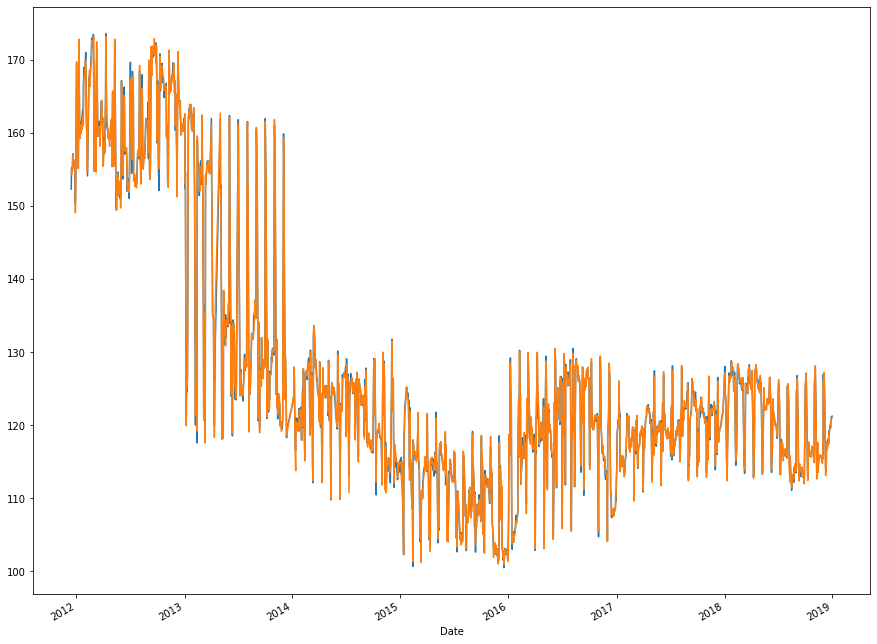

In [ ]:
from IPython.core.pylabtools import figsize
df_gold['Close'].plot(figsize=(15,12))
df_gold['Open'].plot(figsize=(15,12))



In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df_gold.sort_index(inplace=True)


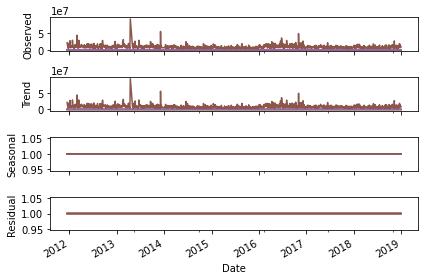

In [ ]:
decompose_result = seasonal_decompose(df_gold, model='multiplicative', freq=1)
decompose_result.plot();


In [ ]:
len(df_gold)

1718

In [ ]:
df_gold = df_gold.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)

In [ ]:
df_gold.head()

,Close
Date,
2011-12-15,152.330002
2011-12-16,155.229996
2011-12-19,154.869995
2011-12-20,156.979996
2011-12-21,157.160004


In [ ]:
train = df_gold.iloc[:343]
test = df_gold.iloc[343:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
df_gold.head(),df_gold.tail()

(                 Close
 Date                  
 2011-12-15  152.330002
 2011-12-16  155.229996
 2011-12-19  154.869995
 2011-12-20  156.979996
 2011-12-21  157.160004,                  Close
 Date                  
 2018-12-24  120.019997
 2018-12-26  119.660004
 2018-12-27  120.570000
 2018-12-28  121.059998
 2018-12-31  121.250000)

In [ ]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [ ]:
scaled_train[:10]

array([[0.62020347],
       [0.67196135],
       [0.66553621],
       [0.70319462],
       [0.70640733],
       [0.68641784],
       [0.69123678],
       [0.66625027],
       [0.59700156],
       [0.58468668]])

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [136]:
n_input = 30
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [137]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.62020347 0.67196135 0.66553621 0.70319462 0.70640733 0.68641784
 0.69123678 0.66625027 0.59700156 0.58468668 0.61413535 0.92771724
 0.87506693 0.78065332 0.71247544 0.67035513 0.97644105 0.86542934
 0.74388709 0.76601818 0.78565063 0.77886846 0.79403901 0.81349282
 0.79296794 0.87167583 0.91718722 0.90041046 0.92325534 0.95431023]
Predict this y: 
 [[0.87024799]]


In [138]:
X.shape

(1, 30, 1)

In [139]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [140]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [141]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 50)                10400     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [142]:
#from tensorflow.keras.callbacks import ModelCheckpoint
#cp1 = ModelCheckpoint('model1/', save_best_only=True)
#model.fit(scaled_train,scaled_test,epochs=10, callbacks=[cp1])
model.fit(generator, epochs=50)

Epoch 1/50
313/313 [==============================] - 4s 10ms/step - loss: 0.0643
Epoch 2/50
313/313 [==============================] - 3s 10ms/step - loss: 0.0272
Epoch 3/50
313/313 [==============================] - 3s 9ms/step - loss: 0.0250
Epoch 4/50
313/313 [==============================] - 3s 10ms/step - loss: 0.0231
Epoch 5/50
313/313 [==============================] - 3s 10ms/step - loss: 0.0208
Epoch 6/50
313/313 [==============================] - 3s 10ms/step - loss: 0.0195
Epoch 7/50
313/313 [==============================] - 3s 10ms/step - loss: 0.0190
Epoch 8/50
313/313 [==============================] - 3s 10ms/step - loss: 0.0175
Epoch 9/50
313/313 [==============================] - 3s 9ms/step - loss: 0.0164
Epoch 10/50
313/313 [==============================] - 3s 9ms/step - loss: 0.0154
Epoch 11/50
313/313 [==============================] - 3s 9ms/step - loss: 0.0155
Epoch 12/50
313/313 [==============================] - 4s 12ms/step - loss: 0.0146
Epoch 13/50
313/3

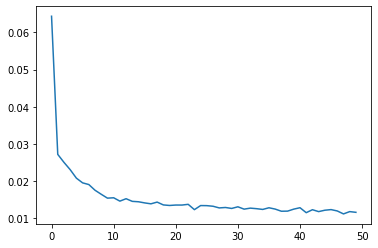

In [143]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [146]:
last_train_batch = scaled_train[-30:]

In [147]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [148]:
model.predict(last_train_batch)

array([[0.29936716]], dtype=float32)

In [149]:
scaled_test[0]


array([0.28395508])

In [150]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [151]:
test_predictions

[array([0.29936716], dtype=float32),
 array([0.3132819], dtype=float32),
 array([0.3295869], dtype=float32),
 array([0.34792116], dtype=float32),
 array([0.36720517], dtype=float32),
 array([0.3864353], dtype=float32),
 array([0.40530503], dtype=float32),
 array([0.4236736], dtype=float32),
 array([0.44146138], dtype=float32),
 array([0.4589044], dtype=float32),
 array([0.476101], dtype=float32),
 array([0.49314532], dtype=float32),
 array([0.5102746], dtype=float32),
 array([0.52787405], dtype=float32),
 array([0.5463324], dtype=float32),
 array([0.56599104], dtype=float32),
 array([0.5867932], dtype=float32),
 array([0.6082122], dtype=float32),
 array([0.6298769], dtype=float32),
 array([0.651273], dtype=float32),
 array([0.6706647], dtype=float32),
 array([0.6878072], dtype=float32),
 array([0.70300037], dtype=float32),
 array([0.71672505], dtype=float32),
 array([0.7295164], dtype=float32),
 array([0.7418215], dtype=float32),
 array([0.7539543], dtype=float32),
 array([0.766059], d

In [152]:
test.head()

,Close,Predictions
Date,,
2013-05-28,133.490005,130.206203
2013-05-29,134.830002,129.998278
2013-05-30,136.699997,134.188333
2013-05-31,133.919998,131.448432
2013-06-02,162.389999,127.680939


In [153]:
true_predictions = scaler.inverse_transform(test_predictions)

In [154]:
test['Predictions'] = true_predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


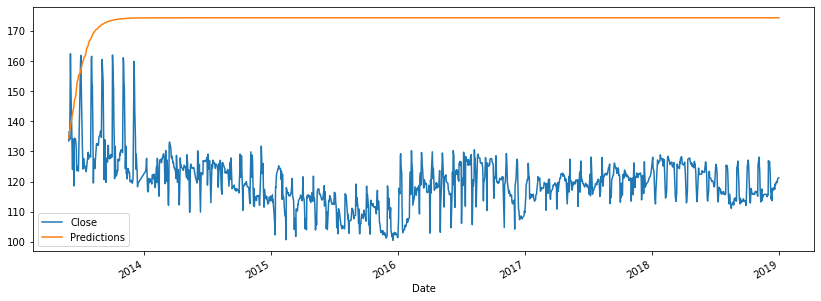

In [155]:
test.plot(figsize=(14,5))

In [157]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Close'],test['Predictions']))
print(rmse/100)

0.5478551388813493
